In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for the DataFrame
data = {
    'CustomerID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'CustomerName': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Henry', 'Ivy', 'Jack'],
    'Product': ['Product A', 'Product B', 'Product C', 'Product A', 'Product B', 'Product C', 'Product A', 'Product B', 'Product C', 'Product A'],
    'Quantity': [2, 3, 1, 4, 2, 3, 1, 5, 2, 3],
    'UnitPrice': [10.50, 15.75, 8.99, 12.25, 9.50, 14.25, 11.75, 13.50, 10.99, 16.75]
}

# Create the DataFrame
df = pd.DataFrame(data)
df


,CustomerID,CustomerName,Product,Quantity,UnitPrice
0,101,Alice,Product A,2,10.50
1,102,Bob,Product B,3,15.75
2,103,Charlie,Product C,1,8.99
3,104,David,Product A,4,12.25
4,105,Emma,Product B,2,9.50
5,106,Frank,Product C,3,14.25
6,107,Grace,Product A,1,11.75
7,108,Henry,Product B,5,13.50
8,109,Ivy,Product C,2,10.99
9,110,Jack,Product A,3,16.75


In [9]:
# Convert DataFrame to JSON file
df.to_json('/content/drive/MyDrive/datasets/sample_data.json', orient='records')

# Load the data from the JSON file into a DataFrame
df = pd.read_json('/content/drive/MyDrive/datasets/sample_data.json')

In [10]:
# Calculate the total revenue generated by the company from the orders
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
total_revenue = df['TotalPrice'].sum()
total_revenue

339.47

In [11]:
# Determine the most popular product(s) based on the quantity sold
popular_products = df.groupby('Product')['Quantity'].sum().idxmax()
popular_products

'Product A'

In [12]:
# Identify the top 5 customers who made the highest total purchase amount
top_customers = df.groupby('CustomerName')['TotalPrice'].sum().nlargest(5).reset_index()
top_customers


,CustomerName,TotalPrice
0,Henry,67.50
1,Jack,50.25
2,David,49.00
3,Bob,47.25
4,Frank,42.75


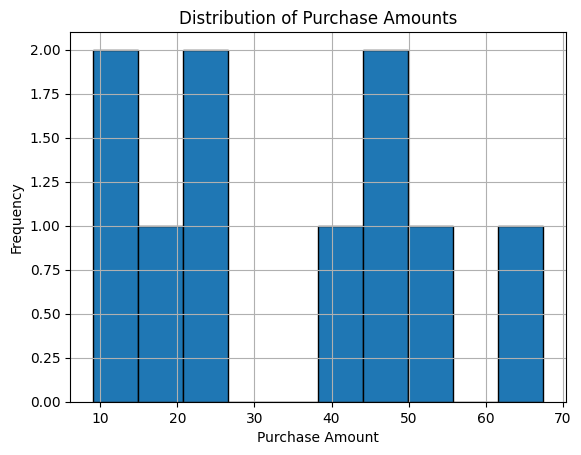

In [13]:
# Visualize the distribution of purchase amounts using a histogram
plt.hist(df['TotalPrice'], bins=10, edgecolor='black')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Amounts')
plt.grid(True)
plt.show()

In [14]:
# # Create a new DataFrame for analysis results
analysis_results = {
    'TotalRevenue': total_revenue,
    'MostPopularProduct': popular_products,
    'TopCustomers': top_customers.to_dict(orient='records')
}

results_df = pd.DataFrame(analysis_results)
# Save the analysis results to a JSON file
results_df.to_json('/content/drive/MyDrive/datasets/analysis_results.json', orient='records')